# Data Preparation


In [1]:
# --------------------------------------------------------------------------------------------------------
# population.ipynb -- data preparation, inspection, and visualization 
# --------------------------------------------------------------------------------------------------------
# 0.01|02.01.22|AB|creation
# 0.02|03.01.22|AB|save result with pickle
# 0.03|16.01.22|AB|save as csv, name diagram, corrected imputation
# --------------------------------------------------------------------------------------------------------

# initialize

import numpy as np
import pandas as pd
#import glob
import os
import matplotlib.pyplot as plt

#from datetime import datetime, date 
import re # regular expression
import seaborn as sns

# %matplotlib inline
# %matplotlib notebook

PATH_DATA = r'../../data/'
INTERACTIVE = False
VALUE_COLNAME = 'nPopulation'  # name for new column containing value of timeseries

if INTERACTIVE:
    %matplotlib notebook
else:
    %matplotlib inline
    

## Population

_The number of persons having their usual residence in a country on 1 January of the respective year. When usually resident population is not available, countries may report legal or registered residents._

- information about data availabilty
https://ec.europa.eu/eurostat/web/main/data/database?p_p_id=NavTreeportletprod_WAR_NavTreeportletprod_INSTANCE_nPqeVbPXRmWQ&p_p_lifecycle=0&p_p_state=pop_up&p_p_mode=view&_NavTreeportletprod_WAR_NavTreeportletprod_INSTANCE_nPqeVbPXRmWQ_nodeInfoService=true&nodeId=-9012

- meta data: N/A
Last data update: 	13/03/2021 23:00     
Overall data coverage: 	2010 — 2021
Source data set: https://ec.europa.eu/eurostat/databrowser/product/view/MIGR_IMM1CTZ

special cases: ":" missing;
two sets: agedef = COMPLET (age in completed years) and REACH (age reached during the year), resp.

Missing values are indicated by a colon. 
Numbers may be accompanied by a 1- or 2-letter code with the following meaning:

- b: break in time series
- bp: break in time series, provisional
- p: provisional
- e: estimated
- ep: estimated, provisional

For the purpose of this study, this information is ignored and hence the characters removed, facilitating conversion of the data to numeric.
- NO languages, no source country

In [2]:
fileName = PATH_DATA + 'tps00001.tsv'
# header = 1st line; missing value indicated by colon (followed by a space)
data = pd.read_csv(fileName, sep='\t', na_values=[': '], header=0) 
data

,"indic_de,geo\time",2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"JAN,AD",84082,78115 b,78115,76246,NaN,NaN,71732,NaN,74794 e,76177 e,77543 e,NaN
1,"JAN,AL",2918674,2907361,2903008,2897770,2892394,2885796,2875592,2876591,2870324,2862427,2845955,2829741
2,"JAN,AM",3249482,3262650,3274285,3026878,3017079,3010598,2998577,2986151,2972732,2965269,2959694,2963251
3,"JAN,AT",8351643,8375164,8408121,8451860,8507786,8584926,8700471,8772865,8822267,8858775,8901064,8932664
4,"JAN,AZ",8997586,9111078,9235085,9356483,9477119,9593038,9705643,9809981,9898085,9981457,10067108,10119133
5,"JAN,BA",3844046,3843183,3839265,3835645,3830911,3825334,3515982,3509728,3500295,3492018 p,NaN,NaN
6,"JAN,BE",10839905,11000638 b,11075889 b,11137974,11180840,11237274,11311117,11351727,11398589,11455519,11522440,11566041 p
7,"JAN,BG",7421766,7369431,7327224,7284552,7245677,7202198,7153784,7101859,7050034,7000039,6951482,6916548
8,"JAN,BY",9480178,9481193,9465150,9463840,9468154,9480868 e,9498364,9504704,9491823,9427348,9408350,NaN
9,"JAN,CH",7785806,7870134 b,7954662,8039060,8139631,8237666,8327126,8419550,8484130,8544527,8606033,8667088 p


First column defines content of time series. 
First part is always JAN (=January) and may be ignored; second part is either 2-letter country code or a longer code of a group of countries; only the single countries are kept.

In [3]:
# filter rows of single countries
pattern = "[A-Z]{3},[A-Z]{2}"  # "JAN,<2-digit country code>"
colName = data.columns[0] 
data = data[data[colName].str.fullmatch(pattern)]
data

,"indic_de,geo\time",2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"JAN,AD",84082,78115 b,78115,76246,NaN,NaN,71732,NaN,74794 e,76177 e,77543 e,NaN
1,"JAN,AL",2918674,2907361,2903008,2897770,2892394,2885796,2875592,2876591,2870324,2862427,2845955,2829741
2,"JAN,AM",3249482,3262650,3274285,3026878,3017079,3010598,2998577,2986151,2972732,2965269,2959694,2963251
3,"JAN,AT",8351643,8375164,8408121,8451860,8507786,8584926,8700471,8772865,8822267,8858775,8901064,8932664
4,"JAN,AZ",8997586,9111078,9235085,9356483,9477119,9593038,9705643,9809981,9898085,9981457,10067108,10119133
5,"JAN,BA",3844046,3843183,3839265,3835645,3830911,3825334,3515982,3509728,3500295,3492018 p,NaN,NaN
6,"JAN,BE",10839905,11000638 b,11075889 b,11137974,11180840,11237274,11311117,11351727,11398589,11455519,11522440,11566041 p
7,"JAN,BG",7421766,7369431,7327224,7284552,7245677,7202198,7153784,7101859,7050034,7000039,6951482,6916548
8,"JAN,BY",9480178,9481193,9465150,9463840,9468154,9480868 e,9498364,9504704,9491823,9427348,9408350,NaN
9,"JAN,CH",7785806,7870134 b,7954662,8039060,8139631,8237666,8327126,8419550,8484130,8544527,8606033,8667088 p


In [4]:
# transform first column (keep only last two characters (country code) -> new first column 'country'
data.insert(0, 'country', data.iloc[ : , 0].apply(lambda s: s[-2: ])) 
data

,country,"indic_de,geo\time",2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AD,"JAN,AD",84082,78115 b,78115,76246,NaN,NaN,71732,NaN,74794 e,76177 e,77543 e,NaN
1,AL,"JAN,AL",2918674,2907361,2903008,2897770,2892394,2885796,2875592,2876591,2870324,2862427,2845955,2829741
2,AM,"JAN,AM",3249482,3262650,3274285,3026878,3017079,3010598,2998577,2986151,2972732,2965269,2959694,2963251
3,AT,"JAN,AT",8351643,8375164,8408121,8451860,8507786,8584926,8700471,8772865,8822267,8858775,8901064,8932664
4,AZ,"JAN,AZ",8997586,9111078,9235085,9356483,9477119,9593038,9705643,9809981,9898085,9981457,10067108,10119133
5,BA,"JAN,BA",3844046,3843183,3839265,3835645,3830911,3825334,3515982,3509728,3500295,3492018 p,NaN,NaN
6,BE,"JAN,BE",10839905,11000638 b,11075889 b,11137974,11180840,11237274,11311117,11351727,11398589,11455519,11522440,11566041 p
7,BG,"JAN,BG",7421766,7369431,7327224,7284552,7245677,7202198,7153784,7101859,7050034,7000039,6951482,6916548
8,BY,"JAN,BY",9480178,9481193,9465150,9463840,9468154,9480868 e,9498364,9504704,9491823,9427348,9408350,NaN
9,CH,"JAN,CH",7785806,7870134 b,7954662,8039060,8139631,8237666,8327126,8419550,8484130,8544527,8606033,8667088 p


In [5]:
# drop second column
colName = data.columns[1] 
data.pop(colName)
data

,country,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AD,84082,78115 b,78115,76246,NaN,NaN,71732,NaN,74794 e,76177 e,77543 e,NaN
1,AL,2918674,2907361,2903008,2897770,2892394,2885796,2875592,2876591,2870324,2862427,2845955,2829741
2,AM,3249482,3262650,3274285,3026878,3017079,3010598,2998577,2986151,2972732,2965269,2959694,2963251
3,AT,8351643,8375164,8408121,8451860,8507786,8584926,8700471,8772865,8822267,8858775,8901064,8932664
4,AZ,8997586,9111078,9235085,9356483,9477119,9593038,9705643,9809981,9898085,9981457,10067108,10119133
5,BA,3844046,3843183,3839265,3835645,3830911,3825334,3515982,3509728,3500295,3492018 p,NaN,NaN
6,BE,10839905,11000638 b,11075889 b,11137974,11180840,11237274,11311117,11351727,11398589,11455519,11522440,11566041 p
7,BG,7421766,7369431,7327224,7284552,7245677,7202198,7153784,7101859,7050034,7000039,6951482,6916548
8,BY,9480178,9481193,9465150,9463840,9468154,9480868 e,9498364,9504704,9491823,9427348,9408350,NaN
9,CH,7785806,7870134 b,7954662,8039060,8139631,8237666,8327126,8419550,8484130,8544527,8606033,8667088 p


In [6]:
# convert year column names to integer 
yearColumns = range(2010,2022) 
newColumnNames = list(["country", *yearColumns])  # "*" unpacks range
data.columns = newColumnNames
# data.columns.values 
# data["country"]
data[yearColumns]

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,84082,78115 b,78115,76246,NaN,NaN,71732,NaN,74794 e,76177 e,77543 e,NaN
1,2918674,2907361,2903008,2897770,2892394,2885796,2875592,2876591,2870324,2862427,2845955,2829741
2,3249482,3262650,3274285,3026878,3017079,3010598,2998577,2986151,2972732,2965269,2959694,2963251
3,8351643,8375164,8408121,8451860,8507786,8584926,8700471,8772865,8822267,8858775,8901064,8932664
4,8997586,9111078,9235085,9356483,9477119,9593038,9705643,9809981,9898085,9981457,10067108,10119133
5,3844046,3843183,3839265,3835645,3830911,3825334,3515982,3509728,3500295,3492018 p,NaN,NaN
6,10839905,11000638 b,11075889 b,11137974,11180840,11237274,11311117,11351727,11398589,11455519,11522440,11566041 p
7,7421766,7369431,7327224,7284552,7245677,7202198,7153784,7101859,7050034,7000039,6951482,6916548
8,9480178,9481193,9465150,9463840,9468154,9480868 e,9498364,9504704,9491823,9427348,9408350,NaN
9,7785806,7870134 b,7954662,8039060,8139631,8237666,8327126,8419550,8484130,8544527,8606033,8667088 p


Missing values are indicated by a colon. 
Numbers may be accompanied by a 1- or 2-letter code with the following meaning:

- b: break in time series
- bp: break in time series, provisional
- p: provisional
- e: estimated
- ep: estimated, provisional

For the purpose of this study, this information is ignored and hence the characters removed, facilitating conversion of the data to numeric.

In [7]:
# -- cleanse data
# data.replace("[a-z]+", "", regex=True, inplace=True) # warning (could be ignored)
data = data.replace("[a-z]+", "", regex=True, inplace=False) # alternative

# -- missing values
print("Count missing values per year:")
print(data.isna().sum())

Count missing values per year:
country     0
2010        2
2011        1
2012        1
2013        3
2014        3
2015        3
2016        2
2017        4
2018        2
2019        3
2020        5
2021       11
dtype: int64


In [8]:
data.dtypes # all object
# -> convert all year columns of DataFrame to numeric (and ignore errors caused by country)
data = data.apply(pd.to_numeric, errors='ignore')

In [9]:
# year columns become attribute (pivoting wide to long -> melt())
# key is country (for each year and country, a row is to be created)
# use the year columns for the value column 
data = data.melt(['country'], value_vars = yearColumns, var_name = 'year', 
                                              value_name = VALUE_COLNAME) 

In [10]:
data

,country,year,nPopulation
0,AD,2010,84082.0
1,AL,2010,2918674.0
2,AM,2010,3249482.0
3,AT,2010,8351643.0
4,AZ,2010,8997586.0
...,...,...,...
595,SM,2021,NaN
596,TR,2021,83614362.0
597,UA,2021,41418717.0
598,UK,2021,NaN


In [11]:
# -- create an index
#data.set_index(['country', 'year'], inplace = True)
data.set_index(['year'], inplace = True)
data

,country,nPopulation
year,,
2010,AD,84082.0
2010,AL,2918674.0
2010,AM,3249482.0
2010,AT,8351643.0
2010,AZ,8997586.0
...,...,...
2021,SM,NaN
2021,TR,83614362.0
2021,UA,41418717.0


In [12]:
# imputation: linear 
data = data.groupby('country').apply(lambda c: 
  c.interpolate(method = 'linear', limit_direction = 'both', axis = 0))
data

,country,nPopulation
year,,
2010,AD,84082.0
2010,AL,2918674.0
2010,AM,3249482.0
2010,AT,8351643.0
2010,AZ,8997586.0
...,...,...
2021,SM,34735.0
2021,TR,83614362.0
2021,UA,41418717.0


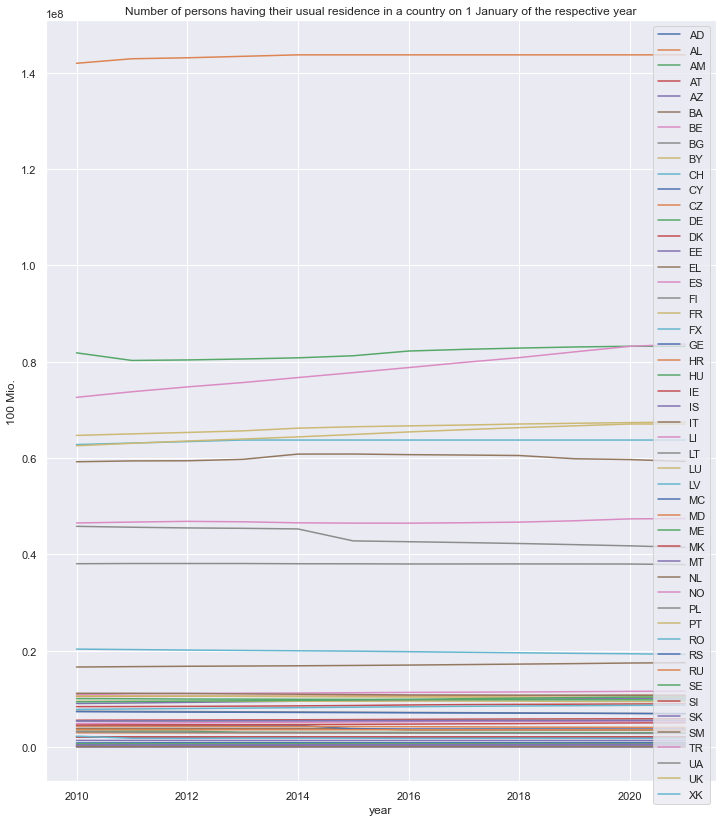

In [13]:
# -- plot timeseries ----
sns.set()
diagTitle = "Number of persons having their usual residence in a country on 1 January of the respective year"
# 1 plot per country:
# _ = immigrationData.groupby('country').plot(figsize = [14,20]) 
# all countries in 1 plot:
_ = data.groupby('country')[VALUE_COLNAME].plot(figsize = [12,14], legend=True, title=diagTitle,
     ylabel = '100 Mio.') 

In [14]:
# alternative: 1 col/country
# _= data.pivot(columns='country', values=VALUE_COLNAME).plot(figsize = [12,14])

In [15]:
# save processed data
data.to_csv(os.path.join(PATH_DATA, "population", "population.csv"), index=True)

In [16]:
if False:
    data.reset_index(inplace=True)
    data